In [96]:
# importing libraries
from __future__ import division
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.offline as pyoff
import plotly.graph_objs as go

In [123]:
df = pd.read_csv('Final_Output.csv',encoding= 'unicode_escape')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice
0,0,541431,23166,74215,2011-01-18 10:01:00,12346,United Kingdom,Nikon 2199 SLR Lenses AF-S NIKKOR 50mm f/1.8G ...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,202.03
1,2,537626,84969,6,2010-12-07 14:57:00,12347,Iceland,Apple iPhone 7 Plus 32GB Verizon Black MNR12LL/A,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,529.97
2,3,537626,22728,4,2010-12-07 14:57:00,12347,Iceland,1.2.4GHz wireless mouse optical mouse 2.50g Li...,https://c1.neweggimages.com/ProductImageCompre...,Gaming Mouse,17.83
3,4,537626,22727,4,2010-12-07 14:57:00,12347,Iceland,Portable Bluetooth Speaker Waterproof Music Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99
4,5,537626,22726,4,2010-12-07 14:57:00,12347,Iceland,Titanium micro FT001-B Blue Smart Bluetooth Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99


In [124]:
df.dtypes

Unnamed: 0       int64
InvoiceNo        int64
StockCode       object
Quantity         int64
InvoiceDate     object
CustomerID       int64
Country         object
Product         object
Img             object
Type            object
UnitPrice      float64
dtype: object

In [125]:
df.isnull().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
Product        0
Img            0
Type           0
UnitPrice      0
dtype: int64

In [126]:
df.duplicated().sum()

0

In [127]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice
0,0,541431,23166,74215,2011-01-18,12346,United Kingdom,Nikon 2199 SLR Lenses AF-S NIKKOR 50mm f/1.8G ...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,202.03
1,2,537626,84969,6,2010-12-07,12347,Iceland,Apple iPhone 7 Plus 32GB Verizon Black MNR12LL/A,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,529.97
2,3,537626,22728,4,2010-12-07,12347,Iceland,1.2.4GHz wireless mouse optical mouse 2.50g Li...,https://c1.neweggimages.com/ProductImageCompre...,Gaming Mouse,17.83
3,4,537626,22727,4,2010-12-07,12347,Iceland,Portable Bluetooth Speaker Waterproof Music Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99
4,5,537626,22726,4,2010-12-07,12347,Iceland,Titanium micro FT001-B Blue Smart Bluetooth Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99
...,...,...,...,...,...,...,...,...,...,...,...
397463,406337,570715,23376,48,2011-10-12,18287,United Kingdom,Samsung Galaxy A10s (SM-A107F/DS) 32GB + 32GB ...,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,140.99
397464,406338,570715,23378,24,2011-10-12,18287,United Kingdom,"Samsung Galaxy A10s( A107F/DS) 6.2"" Display, 3...",https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,140.99
397465,406339,573167,21824,48,2011-10-28,18287,United Kingdom,"Acer Aspire 5 A515-43-R19L 15.6"" Notebook - 19...",https://c1.neweggimages.com/ProductImageCompre...,Laptops,439.00
397466,406340,573167,21014,24,2011-10-28,18287,United Kingdom,Nikon D5500 24MP DSLR Digital Camera AF-P 18-5...,https://c1.neweggimages.com/ProductImageCompre...,DSLR Cameras,759.99


In [128]:
df.shape

(397468, 11)

In [129]:
df.describe()

,Unnamed: 0,InvoiceNo,Quantity,CustomerID,UnitPrice
count,397468.000000,397468.000000,397468.000000,397468.000000,397468.000000
mean,203616.233254,560624.333431,13.026103,15293.880750,795.281623
std,117267.901798,13103.856251,180.522603,1713.187657,1313.243515
min,0.000000,536365.000000,1.000000,12346.000000,2.700000
25%,102168.750000,549238.000000,2.000000,13969.000000,39.990000
50%,203694.500000,561894.000000,6.000000,15158.000000,295.000000
75%,305246.250000,572092.000000,12.000000,16795.000000,899.990000
max,406341.000000,581587.000000,80995.000000,18287.000000,10595.980000


In [130]:
# Add a new column 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,CustomerID,Country,Product,Img,Type,UnitPrice,Revenue
0,0,541431,23166,74215,2011-01-18,12346,United Kingdom,Nikon 2199 SLR Lenses AF-S NIKKOR 50mm f/1.8G ...,https://c1.neweggimages.com/ProductImageCompre...,Camera Lenses,202.03,14993656.45
1,2,537626,84969,6,2010-12-07,12347,Iceland,Apple iPhone 7 Plus 32GB Verizon Black MNR12LL/A,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,529.97,3179.82
2,3,537626,22728,4,2010-12-07,12347,Iceland,1.2.4GHz wireless mouse optical mouse 2.50g Li...,https://c1.neweggimages.com/ProductImageCompre...,Gaming Mouse,17.83,71.32
3,4,537626,22727,4,2010-12-07,12347,Iceland,Portable Bluetooth Speaker Waterproof Music Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99,71.96
4,5,537626,22726,4,2010-12-07,12347,Iceland,Titanium micro FT001-B Blue Smart Bluetooth Sp...,https://c1.neweggimages.com/ProductImageCompre...,Portable Speakers,17.99,71.96
...,...,...,...,...,...,...,...,...,...,...,...,...
397463,406337,570715,23376,48,2011-10-12,18287,United Kingdom,Samsung Galaxy A10s (SM-A107F/DS) 32GB + 32GB ...,https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,140.99,6767.52
397464,406338,570715,23378,24,2011-10-12,18287,United Kingdom,"Samsung Galaxy A10s( A107F/DS) 6.2"" Display, 3...",https://c1.neweggimages.com/ProductImageCompre...,Unlocked Mobiles,140.99,3383.76
397465,406339,573167,21824,48,2011-10-28,18287,United Kingdom,"Acer Aspire 5 A515-43-R19L 15.6"" Notebook - 19...",https://c1.neweggimages.com/ProductImageCompre...,Laptops,439.00,21072.00
397466,406340,573167,21014,24,2011-10-28,18287,United Kingdom,Nikon D5500 24MP DSLR Digital Camera AF-P 18-5...,https://c1.neweggimages.com/ProductImageCompre...,DSLR Cameras,759.99,18239.76


In [131]:
df.dtypes

Unnamed: 0       int64
InvoiceNo        int64
StockCode       object
Quantity         int64
InvoiceDate     object
CustomerID       int64
Country         object
Product         object
Img             object
Type            object
UnitPrice      float64
Revenue        float64
dtype: object

In [132]:
df['CustomerID'].nunique()

4339

In [133]:
import pandas as pd

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Check for missing or incorrect dates
missing_dates = df[df['InvoiceDate'].isnull()]
if not missing_dates.empty:
    print("Warning: Missing or incorrect dates in the following rows:")
    print(missing_dates)

# 1. Calculate Recency (R)
df['Recency'] = (df.groupby('CustomerID')['InvoiceDate'].transform('max') - df['InvoiceDate']).dt.days

# Check for NaN values in 'Recency'
nan_recency = df[df['Recency'].isnull()]
if not nan_recency.empty:
    print("Warning: NaN values in Recency for the following rows:")
    print(nan_recency)

# 2. Calculate Frequency (F)
df['Frequency'] = df.groupby('CustomerID')['InvoiceDate'].transform('count')

# 3. Calculate Monetary (M)
df['Monetary'] = df.groupby('CustomerID')['Revenue'].transform('sum')

# Create an RFM DataFrame with 'CustomerID', 'Recency', 'Frequency', and 'Monetary' without duplicates
rfm_df = df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates(subset=['CustomerID'])
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,0,1,14993656.45
1,12347,365,182,1718395.38
183,12348,283,31,1839896.72
214,12349,0,73,879479.20
287,12350,0,17,126060.98
...,...,...,...,...
396615,18280,0,10,11584.27
396625,18281,0,7,28090.57
396632,18282,119,12,32004.33
396644,18283,334,756,1006238.99


In [135]:
import pandas as pd

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Check for missing or incorrect dates
missing_dates = df[df['InvoiceDate'].isnull()]
if not missing_dates.empty:
    print("Warning: Missing or incorrect dates in the following rows:")
    print(missing_dates)

# 1. Calculate Recency (R)
df['Recency'] = (df.groupby('CustomerID')['InvoiceDate'].transform('max') - df['InvoiceDate']).dt.days

# Check for NaN values in 'Recency'
nan_recency = df[df['Recency'].isnull()]
if not nan_recency.empty:
    print("Warning: NaN values in Recency for the following rows:")
    print(nan_recency)

# 2. Calculate Frequency (F)
df['Frequency'] = df.groupby('CustomerID')['InvoiceDate'].transform('count')

# 3. Calculate Monetary (M)
df['Monetary'] = df.groupby('CustomerID')['Revenue'].transform('sum')

# 4. Calculate Tenure
df['FirstPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['Tenure'] = (df.groupby('CustomerID')['InvoiceDate'].transform('max') - df['FirstPurchaseDate']).dt.days

# Drop intermediate columns used for calculation
df.drop(['FirstPurchaseDate'], axis=1, inplace=True)

# Create an RFM DataFrame with 'CustomerID', 'Recency', 'Frequency', 'Monetary', and 'Tenure' without duplicates
rfm_df = df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Tenure']].drop_duplicates(subset=['CustomerID'])
rfm_df

,CustomerID,Recency,Frequency,Monetary,Tenure
0,12346,0,1,14993656.45,0
1,12347,365,182,1718395.38,365
183,12348,283,31,1839896.72,283
214,12349,0,73,879479.20,0
287,12350,0,17,126060.98,0
...,...,...,...,...,...
396615,18280,0,10,11584.27,0
396625,18281,0,7,28090.57,0
396632,18282,119,12,32004.33,119
396644,18283,334,756,1006238.99,334


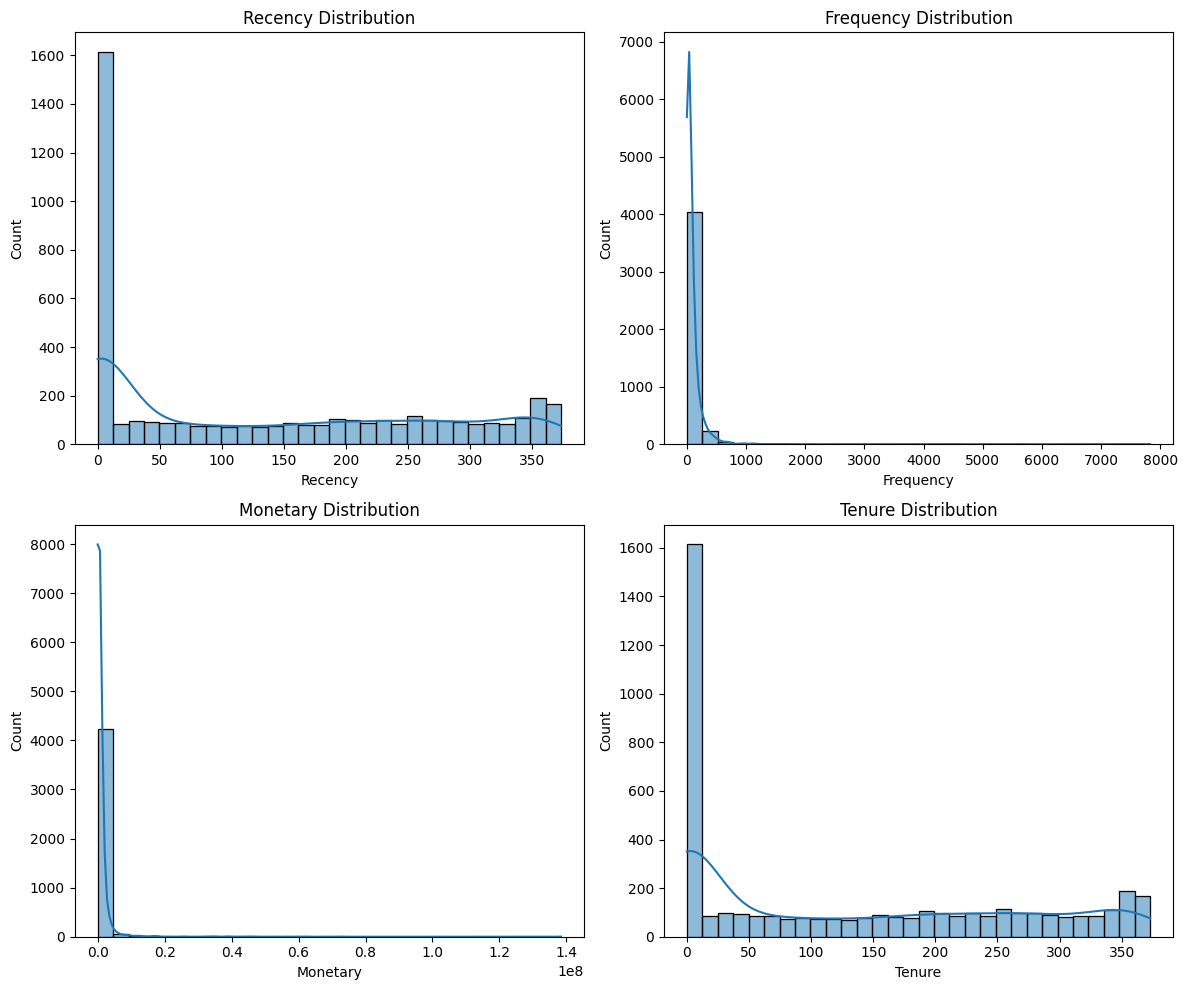

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot Recency distribution
sns.histplot(rfm_df['Recency'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Recency Distribution')

# Plot Frequency distribution
sns.histplot(rfm_df['Frequency'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Frequency Distribution')

# Plot Monetary distribution
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Monetary Distribution')

# Plot Tenure distribution
sns.histplot(rfm_df['Tenure'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Tenure Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


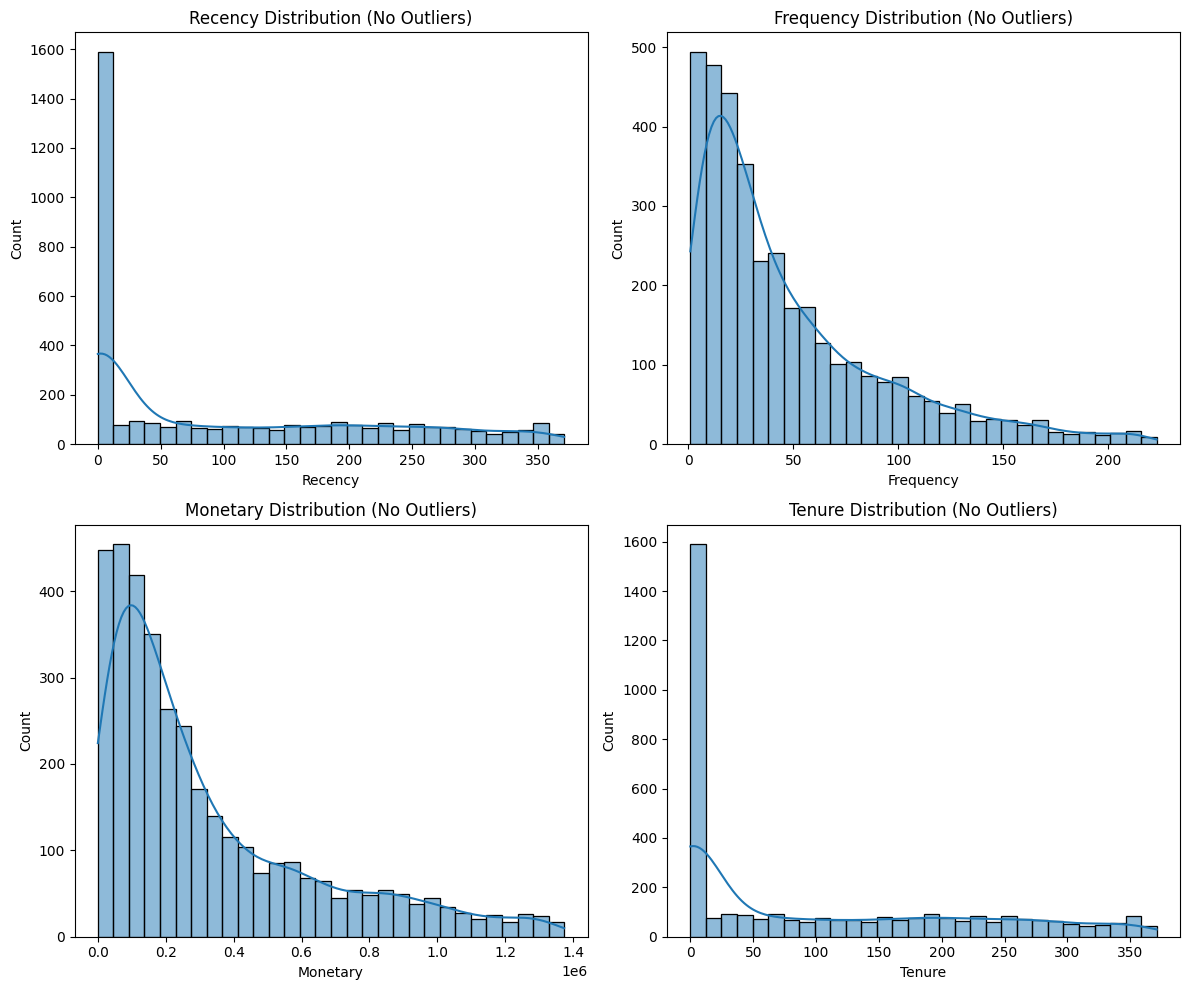

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from each column in rfm_df
rfm_df_no_outliers = rfm_df.copy()
columns_to_remove_outliers = ['Recency', 'Frequency', 'Monetary', 'Tenure']

for column in columns_to_remove_outliers:
    rfm_df_no_outliers = remove_outliers(rfm_df_no_outliers, column)

# Set up the matplotlib figure for the plots after removing outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot Recency distribution after removing outliers
sns.histplot(rfm_df_no_outliers['Recency'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Recency Distribution (No Outliers)')

# Plot Frequency distribution after removing outliers
sns.histplot(rfm_df_no_outliers['Frequency'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Frequency Distribution (No Outliers)')

# Plot Monetary distribution after removing outliers
sns.histplot(rfm_df_no_outliers['Monetary'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Monetary Distribution (No Outliers)')

# Plot Tenure distribution after removing outliers
sns.histplot(rfm_df_no_outliers['Tenure'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Tenure Distribution (No Outliers)')

# Adjust layout
plt.tight_layout()
plt.show()


In [161]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Tenure
0,12346,0,1,14993656.45,0
1,12347,365,182,1718395.38,365
183,12348,283,31,1839896.72,283
214,12349,0,73,879479.20,0
287,12350,0,17,126060.98,0
...,...,...,...,...,...
396615,18280,0,10,11584.27,0
396625,18281,0,7,28090.57,0
396632,18282,119,12,32004.33,119
396644,18283,334,756,1006238.99,334


In [168]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def min_max_scale_dataframe(dataframe, columns_to_scale):
    """
    Scale specified columns of a DataFrame using Min-Max scaling.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - columns_to_scale (list): List of column names to be scaled.

    Returns:
    - pd.DataFrame: Scaled DataFrame.
    """
    # Drop rows with NaN values in 'CustomerID' before scaling
    dataframe = dataframe.dropna(subset=['CustomerID'])

    # Extract 'CustomerID' column for later addition
    customer_ids = dataframe['CustomerID']

    # Ensure 'CustomerID' is not in the list of columns to scale
    if 'CustomerID' in columns_to_scale:
        columns_to_scale.remove('CustomerID')

    # Scale columns excluding 'CustomerID'
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(dataframe[columns_to_scale])
    scaled_dataframe = pd.DataFrame(scaled_data, columns=columns_to_scale)

    # Add 'CustomerID' back to the scaled DataFrame
    scaled_dataframe['CustomerID'] = customer_ids.values

    # Combine with the remaining columns
    for column in dataframe.columns:
        if column not in columns_to_scale and column != 'CustomerID':
            scaled_dataframe[column] = dataframe[column]

    return scaled_dataframe

# Assuming 'rfm_df' is your DataFrame and you want to scale 'Recency', 'Frequency', 'Monetary', and 'Tenure'
columns_to_scale = ['Recency', 'Frequency', 'Monetary', 'Tenure']

scaled_rfm_df = min_max_scale_dataframe(rfm_df, columns_to_scale)
scaled_rfm_df

,Recency,Frequency,Monetary,Tenure,CustomerID
0,0.000000,0.000000,0.108334,0.000000,12346
1,0.978552,0.023116,0.012416,0.978552,12347
2,0.758713,0.003831,0.013294,0.758713,12348
3,0.000000,0.009195,0.006354,0.000000,12349
4,0.000000,0.002043,0.000911,0.000000,12350
...,...,...,...,...,...
4334,0.000000,0.001149,0.000083,0.000000,18280
4335,0.000000,0.000766,0.000203,0.000000,18281
4336,0.319035,0.001405,0.000231,0.319035,18282
4337,0.895442,0.096424,0.007270,0.895442,18283


In [176]:
import pandas as pd

def calculate_rfm(dataframe):
    """
    Calculate RFM attributes and corresponding groups for each customer.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame containing 'Recency', 'Frequency', 'Monetary', and 'CustomerID' columns.

    Returns:
    - pd.DataFrame: DataFrame with 'CustomerID', 'Recency', 'Frequency', 'Monetary', 'R Group', 'F Group', 'M Group', 'RFM Score' columns.
    """
    # Bin edges for Recency, Frequency, and Monetary (scaled between 0 and 1)
    r_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    f_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    m_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    # Create 'R Group', 'F Group', 'M Group' columns based on binning
    dataframe['R Group'] = pd.cut(dataframe['Recency'], bins=r_bins, labels=False, right=False)
    dataframe['F Group'] = pd.cut(dataframe['Frequency'], bins=f_bins, labels=False, right=False)
    dataframe['M Group'] = pd.cut(dataframe['Monetary'], bins=m_bins, labels=False, right=False)

    # Display the rows where NaN values occur after binning
    print("\nRows with NaN values after binning:")
    print(dataframe[dataframe[['R Group', 'F Group', 'M Group']].isnull().any(axis=1)])

    # Calculate RFM Score
    dataframe['RFM Score'] = (dataframe['R Group'] + dataframe['F Group'] + dataframe['M Group']) / 3

    return dataframe[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R Group', 'F Group', 'M Group', 'RFM Score']]

# Assuming 'rfm_df' is your DataFrame
result_df = calculate_rfm(rfm_df)
result_df


Rows with NaN values after binning:
        CustomerID  Recency  Frequency     Monetary  Tenure  R Group  F Group  \
0            12346        0          1  14993656.45       0      0.0      NaN   
1            12347      365        182   1718395.38     365      NaN      NaN   
183          12348      283         31   1839896.72     283      NaN      NaN   
214          12349        0         73    879479.20       0      0.0      NaN   
287          12350        0         17    126060.98       0      0.0      NaN   
...            ...      ...        ...          ...     ...      ...      ...   
396615       18280        0         10     11584.27       0      0.0      NaN   
396625       18281        0          7     28090.57       0      0.0      NaN   
396632       18282      119         12     32004.33     119      NaN      NaN   
396644       18283      334        756   1006238.99     334      NaN      NaN   
397400       18287      159         68    971948.30     159      NaN    

,CustomerID,Recency,Frequency,Monetary,R Group,F Group,M Group,RFM Score
0,12346,0,1,14993656.45,0.0,NaN,NaN,NaN
1,12347,365,182,1718395.38,NaN,NaN,NaN,NaN
183,12348,283,31,1839896.72,NaN,NaN,NaN,NaN
214,12349,0,73,879479.20,0.0,NaN,NaN,NaN
287,12350,0,17,126060.98,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
396615,18280,0,10,11584.27,0.0,NaN,NaN,NaN
396625,18281,0,7,28090.57,0.0,NaN,NaN,NaN
396632,18282,119,12,32004.33,NaN,NaN,NaN,NaN
396644,18283,334,756,1006238.99,NaN,NaN,NaN,NaN


In [177]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def calculate_rfm(dataframe):
    """
    Calculate RFM attributes and corresponding groups for each customer.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame containing 'Recency', 'Frequency', 'Monetary', and 'CustomerID' columns.

    Returns:
    - pd.DataFrame: DataFrame with 'CustomerID', 'Recency', 'Frequency', 'Monetary', 'R Group', 'F Group', 'M Group', 'RFM Score' columns.
    """
    # Scale 'Frequency' and 'Monetary' columns
    scaler = MinMaxScaler()
    dataframe[['Frequency', 'Monetary']] = scaler.fit_transform(dataframe[['Frequency', 'Monetary']])

    # Bin edges for Recency, Frequency, and Monetary
    r_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    f_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    m_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    # Create 'R Group', 'F Group', 'M Group' columns based on binning
    dataframe['R Group'] = pd.cut(dataframe['Recency'], bins=r_bins, labels=False, right=False)
    dataframe['F Group'] = pd.cut(dataframe['Frequency'], bins=f_bins, labels=False, right=False)
    dataframe['M Group'] = pd.cut(dataframe['Monetary'], bins=m_bins, labels=False, right=False)

    # Print information about NaN values after binning
    print("\nNaN values after binning:")
    print(dataframe[['R Group', 'F Group', 'M Group']].isnull().sum())

    # Calculate RFM Score
    dataframe['RFM Score'] = (dataframe['R Group'] + dataframe['F Group'] + dataframe['M Group']) / 3

    return dataframe[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R Group', 'F Group', 'M Group', 'RFM Score']]

# Assuming 'rfm_df' is your DataFrame
result_df = calculate_rfm(rfm_df)



NaN values after binning:
R Group    2790
F Group       1
M Group       1
dtype: int64


In [181]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def calculate_rfm(dataframe):
    """
    Calculate RFM attributes and corresponding groups for each customer.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame containing 'Recency', 'Frequency', 'Monetary', and 'CustomerID' columns.

    Returns:
    - pd.DataFrame: DataFrame with 'CustomerID', 'Recency', 'Frequency', 'Monetary', 'R Group', 'F Group', 'M Group', 'RFM Score' columns.
    """
    # Fill NaN values in 'Recency' column with the mean
    dataframe['Recency'].fillna(dataframe['Recency'].mean(), inplace=True)

    # Scale 'Frequency' and 'Monetary' columns
    scaler = MinMaxScaler()
    dataframe[['Frequency', 'Monetary']] = scaler.fit_transform(dataframe[['Frequency', 'Monetary']])

    # Use qcut for 'Recency' column to perform quantile-based binning
    dataframe['R Group'] = pd.qcut(dataframe['Recency'], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=False, duplicates='drop')
    dataframe['F Group'] = pd.cut(dataframe['Frequency'], bins=5, labels=False, right=False)
    dataframe['M Group'] = pd.cut(dataframe['Monetary'], bins=5, labels=False, right=False)

    # Print information about NaN values after binning
    print("\nNaN values after binning:")
    print(dataframe[['R Group', 'F Group', 'M Group']].isnull().sum())

    # Calculate RFM Score
    dataframe['RFM Score'] = (dataframe['R Group'] + dataframe['F Group'] + dataframe['M Group']) / 3

    return dataframe[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R Group', 'F Group', 'M Group', 'RFM Score']]

# Assuming 'rfm_df' is your DataFrame
result_df = calculate_rfm(rfm_df)

result_df


NaN values after binning:
R Group    0
F Group    0
M Group    0
dtype: int64


,CustomerID,Recency,Frequency,Monetary,R Group,F Group,M Group,RFM Score
0,12346,0,0.000000,0.108334,0,0,0,0.000000
1,12347,365,0.023116,0.012416,3,0,0,1.000000
183,12348,283,0.003831,0.013294,3,0,0,1.000000
214,12349,0,0.009195,0.006354,0,0,0,0.000000
287,12350,0,0.002043,0.000911,0,0,0,0.000000
...,...,...,...,...,...,...,...,...
396615,18280,0,0.001149,0.000083,0,0,0,0.000000
396625,18281,0,0.000766,0.000203,0,0,0,0.000000
396632,18282,119,0.001405,0.000231,1,0,0,0.333333
396644,18283,334,0.096424,0.007270,3,0,0,1.000000
